In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image

In [39]:
category_df = pd.read_csv(r'C:\Users\evilk\Desktop\polyvore_outfits\categories.csv')

In [40]:
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_id    194 non-null    int64 
 1   sub_category   194 non-null    object
 2   main_category  189 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.7+ KB


In [41]:
category_df['sub_category'].unique()

array(['dress', 'gown', 'skirt', 'long skirt', 'sweater',
       'sleeveless top', 'shirt', 'top', 'tunic', 'blouse',
       'long-sleeve shirt', 'cardigan', 'turtleneck sweater',
       'male T-shirt', 'tshirt', 'jacket/coat', 'trench coat', 'coat',
       'blazer', 'jacket', 'parka', 'vest', 'jeans', 'pants', 'pant',
       'shorts', 'set/suit', 'swimsuit bottom', 'backpack', 'tote',
       'purse', 'handbag', 'bag', 'clutch', 'flat sandals',
       'closed shoes', 'heels', 'boots', 'pump', 'sandals', 'flats',
       'flip-flops', 'sneakers', 'slippers', 'gloves', 'scarf', 'belt',
       'straw hat', 'baseball cap', 'beanie', 'hat', 'winter hat', 'tie',
       'sunglasses', 'headband', 'umbrella', 'watch', 'necklace',
       'earrings', 'ring', 'stockings', 'socks', 'tank', 'bracelet',
       'pendant', 'pouch', 'jumpsuit', 'romper', 'lingerie top',
       'lingerie bottom', 'pyjama/slip/chemise', 'pyjama pants', 'kimono',
       'hosiery', 'sports long-sleeve shirt', 'sweatpants',
 

In [42]:
category_df['main_category'].unique()

array(['all-body', 'bottoms', 'tops', 'outerwear', 'bags', 'shoes',
       'accessories ', 'scarves', 'accessories', 'hats', 'sunglasses',
       'jewellery', 'jewellery ', nan], dtype=object)

In [43]:
import json

with open(r'C:\Users\evilk\Desktop\polyvore_outfits\polyvore_item_metadata.json','r') as f:
    meta=json.load(f)
    
category_df["main_category"] = category_df["main_category"].str.strip().str.lower()

allowed_main = {"tops", "bottoms", "all-body"}

allowed_ids = set(category_df.loc[category_df["main_category"].isin(allowed_main), "category_id"])
print("Allowed category_ids:", allowed_ids)

# Step 2: ensure type match
allowed_ids = set(map(int, allowed_ids))  

allowed_items = {item_id for item_id, info in meta.items()
                 if int(info.get("category_id", -1)) in allowed_ids}

print("Total allowed items:", len(allowed_items))


Allowed category_ids: {256, 257, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 272, 17, 273, 19, 275, 21, 278, 279, 280, 281, 26, 27, 28, 29, 30, 31, 282, 284, 286, 287, 288, 289, 4517, 4518, 309, 310, 315, 1605, 1606, 332, 341, 342, 343, 4495, 4496, 4452, 4454, 104, 4458, 4459, 237, 238, 239, 240, 241, 243, 244, 248, 249, 250, 252, 253, 254, 255}
Total allowed items: 79146


In [44]:
import os,glob


img_root=r'C:\Users\evilk\Desktop\polyvore_outfits'
all_img=glob.glob(os.path.join(img_root,'**','*.jpg'),recursive=True)


print("Total images found:", len(all_img))
print("Examples:", all_img[:20])


Total images found: 261057
Examples: ['C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\100004189.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\100005237.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\100007550.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\100010397.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\100010564.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\100010612.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\100015328.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\100015595.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\100018459.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\100018712.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\100018720.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\100019428.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\100020521.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images

In [45]:
first_key = next(iter(meta))
print("Example item_id:", first_key)
print("Metadata keys:", meta[first_key].keys())
print("Metadata sample:", meta[first_key])


Example item_id: 211990161
Metadata keys: dict_keys(['url_name', 'description', 'title', 'related', 'category_id', 'semantic_category', 'categories'])
Metadata sample: {'url_name': 'neck print chiffon plus size', 'description': '', 'title': '', 'related': '', 'category_id': '15', 'semantic_category': 'tops', 'categories': ''}


In [46]:
allowed_images = []

for item_id in allowed_items:
    img_path=os.path.join(img_root,"images",f"{item_id}.jpg")
    if os.path.exists(img_path):
        allowed_images.append(img_path)
        
print("Final Allowed Images:", len(allowed_images))
print("Sample paths:", allowed_images[:10])

Final Allowed Images: 79146
Sample paths: ['C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\100473843.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\169350454.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\87880393.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\182561567.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\200718064.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\208952511.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\204484437.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\144878044.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\152916808.jpg', 'C:\\Users\\evilk\\Desktop\\polyvore_outfits\\images\\167465754.jpg']


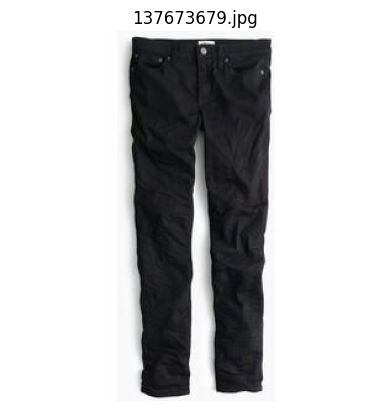

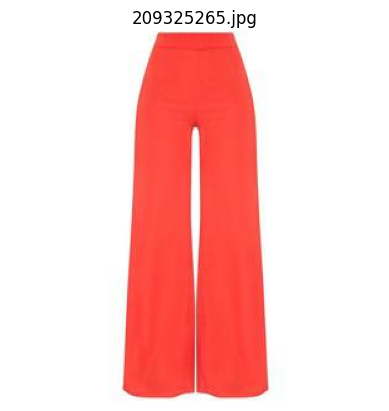

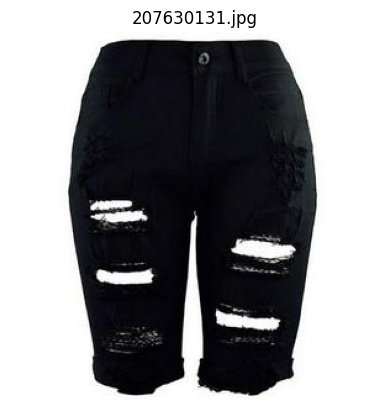

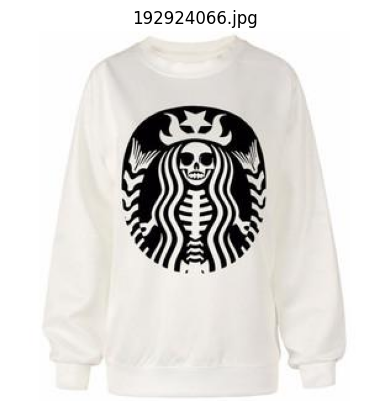

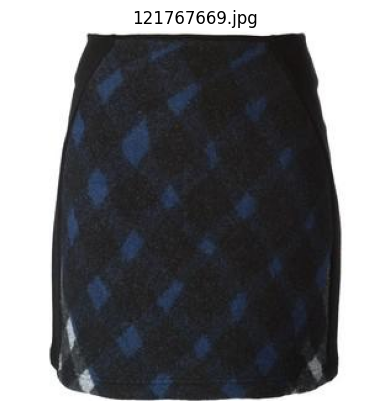

In [47]:

sample_imgs = random.sample(allowed_images, 5)

for path in sample_imgs:
    img = Image.open(path)
    plt.imshow(img)
    plt.title(path.split("\\")[-1])
    plt.axis("off")
    plt.show()



In [48]:
import torch 
from torchvision import transforms
from torch.utils.data import DataLoader,Dataset


# Transforms
    Transforms doing three main things:

        1.Resize: make all images same size (380×380).
        2.ToTensor: convert image to PyTorch tensor.
        3.Normalize: scale pixel values like ImageNet-trained CNN expects.



In [49]:


img_size = 224 
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),     
    transforms.ToTensor(),                   
    transforms.Normalize(                     
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


# Dataset

In [50]:
class FashionDataset(Dataset):
    def __init__(self, img_paths, meta, transform=None):
        self.img_paths = img_paths
        self.meta = meta
        self.transform = transform

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        path = self.img_paths[idx]
        try:
            item_id = int(path.split("\\")[-1].split(".")[0])  # convert to int
            img = Image.open(path).convert("RGB")
            if self.transform:
                img = self.transform(img)
            return img, item_id
        except Exception as e:
            print("Skipped:", path, e)
            return None


# DataLoader

In [51]:
batch_size=32

dataset=FashionDataset(allowed_images,meta,transform=transform)

dataloader=DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=4 ,
    pin_memory=True
    
)

In [52]:
dataset = FashionDataset(allowed_images, meta, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=0, pin_memory=True)

images, item_ids = next(iter(dataloader))
print(images.shape, item_ids[:5])


torch.Size([32, 3, 224, 224]) tensor([100473843, 169350454,  87880393, 182561567, 200718064])


# Feature Extraction with EfficientNet-B4

In [53]:
import torchvision.models as models
import torch.nn as nn

device= "cuda" if torch.cuda.is_available() else "cpu"

print(device)

cuda


In [54]:
model = models.efficientnet_b4(pretrained=True)
model.classifier=nn.Identity()
model=model.to(device)

model.eval

c:\Users\evilk\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\evilk\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B4_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B4_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<bound method Module.eval of EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
 

In [55]:
embeddings_list=[]
item_ids_list=[]

with torch.no_grad():
    for imgs, item_ids in dataloader:
        imgs = imgs.to(device)
        embs = model(imgs) 
        embeddings_list.append(embs.cpu())
        item_ids_list.extend(item_ids)

embeddings = torch.cat(embeddings_list) 
print("Embeddings shape:", embeddings.shape)

Embeddings shape: torch.Size([79146, 1792])


In [56]:
torch.save({
    "embeddings": embeddings,
    "item_ids": item_ids_list
}, "fashion_embeddings.pt")

In [57]:

data = torch.load("fashion_embeddings.pt")
embeddings = data["embeddings"]
item_ids = data["item_ids"]

print("Embeddings shape:", embeddings.shape)  # should be [79000, embedding_dim]
print("Number of item_ids:", len(item_ids))   # should be 79000


Embeddings shape: torch.Size([79146, 1792])
Number of item_ids: 79146
